# Assignment 3

## Problem 1: Expectation Maximization

This problem comes (approximately) from Chapter 17 of the Forsyth book: create a Gaussian mixture model using expectation maximization to segment an image. You are allowed to manually specify how many Gaussians you will have in the final result. (Easiest case to test might be 2: foreground and background; you might want to experiment with larger numbers to reflect more objects in the image.) You need only do this for single parameter images (gray-scale), although you can use color if you wish (harder). Do not use existing packages. Think of this as fitting a Gaussian mixture model to the image histogram: we don’t care about where the pixel is (although we could); we only care about intensities and their probabilities.

You might also look at the Wikipedia article on mixture modeling (https://en.wikipedia.org/wiki/Mixture_model#Gaussian_mixture_model). Brilliant.org also had a nice read on Gaussian mixture modelling (https://brilliant.org/wiki/gaussian-mixture-model/) Try your algorithm on an image of your choice. Provide me the original image and an image with pixels labeled by Gaussian model to which they belonged. (You can use color or grayscale to do the labelling.) Put all your work into a single file: all images and program code. Submit using the dropbox in D2L.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [4]:
def init_params(num_components, data):
    means = np.linspace(np.min(data), np.max(data), num_components)
    vars_ = np.full(num_components, np.var(data))
    weights = np.full(num_components, 1 / num_components)
    return means, vars_, weights

In [5]:
def gaussian_pdf(x, mean, var):
    return (1.0 / np.sqrt(2 * np.pi * var)) * np.exp(- ((x - mean) ** 2) / (2 * var))

In [6]:
def e_step(data, means, vars_, weights):
    n_samples, n_components = len(data), len(means)
    resp = np.zeros((n_samples, n_components))

    for k in range(n_components):
        resp[:, k] = weights[k] * gaussian_pdf(data, means[k], vars_[k])

    resp /= np.sum(resp, axis=1, keepdims=True)
    return resp

In [7]:
def m_step(data, resp):
    n_samples, n_components = resp.shape
    Nk = np.sum(resp, axis=0)
    means = np.sum(resp * data[:, np.newaxis], axis=0) / Nk
    vars_ = np.sum(resp * (data[:, np.newaxis] - means) ** 2, axis=0) / Nk
    weights = Nk / n_samples
    return means, vars_, weights

In [8]:
def gmm_fit(data, num_components=2, max_iters=20):
    means, vars_, weights = init_params(num_components, data)

    for _ in range(max_iters):
        resp = e_step(data, means, vars_, weights)
        means, vars_, weights = m_step(data, resp)

    return means, vars_, weights, resp

In [9]:

def segment_img(image, num_components=2):
    flat_data = image.flatten().astype(np.float64)
    means, vars_, weights, resp = gmm_fit(flat_data, num_components)

    labels = np.argmax(resp, axis=1)
    segmented_img = means[labels].reshape(image.shape).astype(np.uint8)

    return segmented_img, labels.reshape(image.shape), means

In [10]:
def plot_hist_with_gmms(image, means, vars_, weights):
    flat_data = image.flatten()
    hist, bins = np.histogram(flat_data, bins=256, range=(0, 256), density=True)
    bin_centers = (bins[:-1] + bins[1:]) / 2

    plt.figure(figsize=(8, 5))
    plt.plot(bin_centers, hist, label='Image Histogram', color='gray')

    x = np.linspace(0, 255, 500)
    for i in range(len(means)):
        gauss_curve = weights[i] * (1 / np.sqrt(2 * np.pi * vars_[i])) * \
                      np.exp(- (x - means[i]) ** 2 / (2 * vars_[i]))
        plt.plot(x, gauss_curve, label=f'Gaussian {i+1}', linewidth=2)

    plt.title('Pixel Intensity Histogram with GMM Components')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('histogram_with_gmms.png')
    plt.show()

### Test for k=2

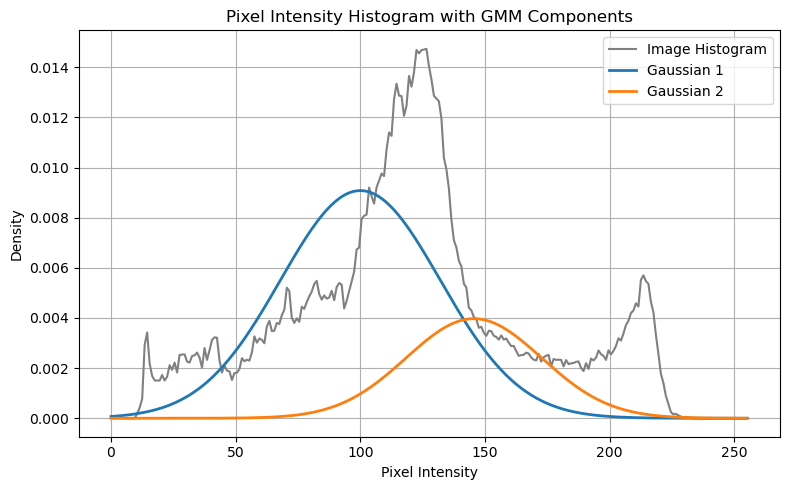

In [40]:
img = cv2.imread('/Users/kavanamanvi/Desktop/ComputerVision/HW3/img1.jpg', cv2.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError("Image 'test_image.png' not found in working directory.")

segmented, labels, means = segment_img(img, num_components=2)
plot_hist_with_gmms(img, means, [np.var(img[labels == i]) for i in range(2)], [np.mean(labels == i) for i in range(2)])

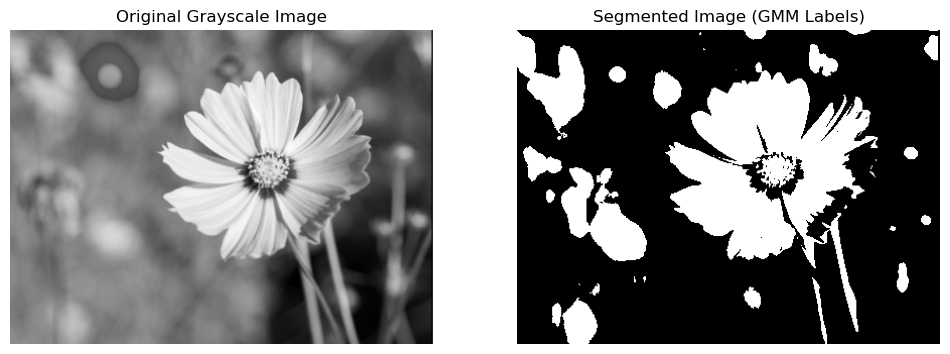

In [29]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Grayscale Image')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Segmented Image (GMM Labels)')
plt.imshow(segmented, cmap='gray')
plt.axis('off')
plt.show()

Foreground (flower) – brighter region labeled as one Gaussian.

Background – darker regions assigned to the second Gaussian.

### Test for k=3

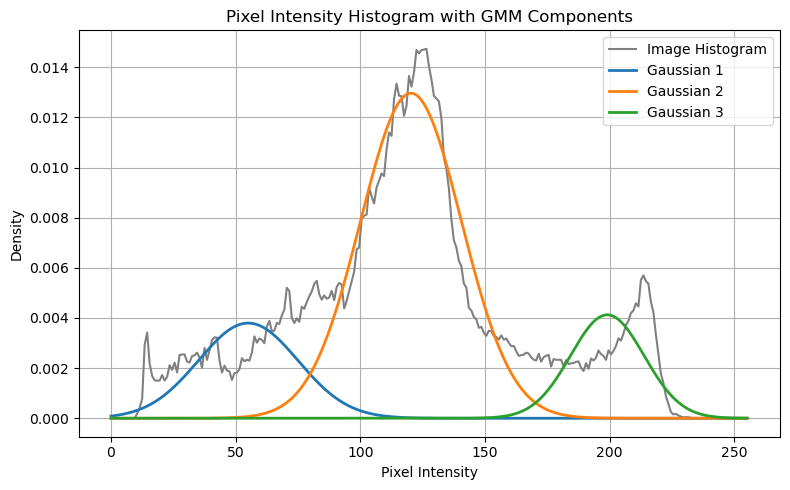

In [36]:
# Load grayscale image
img = cv2.imread('/Users/kavanamanvi/Desktop/ComputerVision/HW3/img1.jpg', cv2.IMREAD_GRAYSCALE)

segmented, labels, means = segment_img(img, num_components=3)
plot_hist_with_gmms(img, means, [np.var(img[labels == i]) for i in range(3)], [np.mean(labels == i) for i in range(3)])

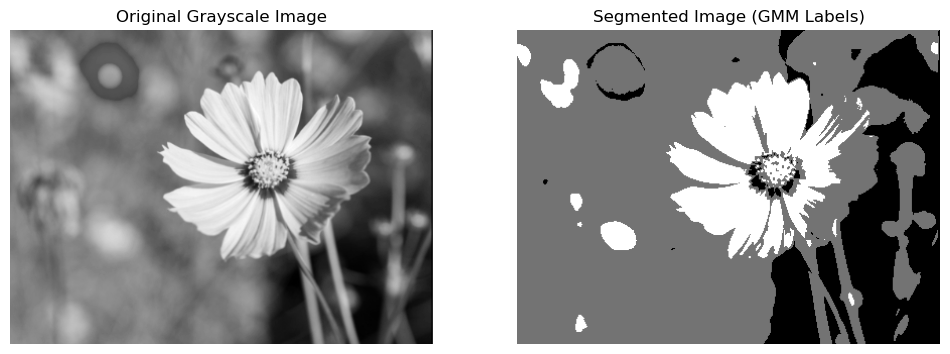

In [38]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Grayscale Image')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Segmented Image (GMM Labels)')
plt.imshow(segmented, cmap='gray')
plt.axis('off')
plt.show()

Foreground (flower) – brighter region labeled as one Gaussian.

Background – slightly darker regions assigned to the second Gaussian. Darkest regions assigned to third Gaussian.